In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10)

#supress warnings
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
df = pd.read_csv('BangaloreZomatoData.csv')
df.head()

Name                                                URL  \
0        Sri Udupi Park  https://www.zomato.com/bangalore/sri-udupi-par...   
1         Meghana Foods  https://www.zomato.com/bangalore/meghana-foods...   
2  Donne Biriyani House  https://www.zomato.com/bangalore/donne-biriyan...   
3        Domino's Pizza  https://www.zomato.com/bangalore/dominos-pizza...   
4                   KFC   https://www.zomato.com/bangalore/kfc-indiranagar   

                                            Cuisines                    Area  \
0  South Indian, North Indian, Chinese, Street Fo...  Indiranagar, Bangalore   
1             Biryani, Andhra, North Indian, Seafood  Indiranagar, Bangalore   
2                                            Biryani  Indiranagar, Bangalore   
3                         Pizza, Fast Food, Desserts  Indiranagar, Bangalore   
4    Burger, Fast Food, Biryani, Desserts, Beverages  Indiranagar, Bangalore   

                         Timing  \
0            7am – 11pm (Today)   
1               Opens at 6:30pm   
2           11am – 11pm (Today)   
3  10:57am – 12midnight (Today)   
4           11am – 11pm (Today)   

                                        Full_Address    PhoneNumber  \
0  273, Monalisa, 6th Main, 100 Feet Road, Indira...  +919945977774   
1  544, First Floor, CMH Road, Near Indiranagar M...  +918041135050   
2  8/ 9, 17th F Cross, 2nd Stage, Indiranagar, Ba...  +918861564169   
3  308, 2nd Stage, 100 Feet Road, Indiranagar, Ba...  +919916465787   
4            38/1A, CMH Road, Indiranagar, Bangalore  +919513700040   

   IsHomeDelivery  isTakeaway  isIndoorSeating  isVegOnly Dinner Ratings  \
0               1           1                1          1            4.0   
1               1           1                1          0            4.3   
2               1           1                1          0            3.9   
3               1           1                1          0            2.4   
4               1           1                1          0            2.8   

   Dinner Reviews Delivery Ratings  Delivery Reviews               KnownFor  \
0             462              4.1             16000                    NaN   
1            1654              4.3             28600  Spicy Chicken Biryani   
2             411              3.5             33200                    NaN   
3             422              4.4              8205                    NaN   
4             673              4.0              9148                    NaN   

                                       PopularDishes  \
0  Filtered Coffee, Sambhar, Pav Bhaji, Gobi Manc...   
1  Authentic Hyderabadi Biryani, Paneer Biryani, ...   
2                                                NaN   
3  Barbeque Chicken Pizza, Choco Lava Cake, White...   
4   Fiery Chicken, Chicken Popcorn, Rice Bowl, Wings   

                                      PeopleKnownFor  AverageCost  
0  Economical, Prompt Service, Hygiene, Quality F...          450  
1  Boneless Chicken Biryani, Ample Seating Area, ...          700  
2  Great Recommendations, Nice Taste, Great Ambia...          300  
3  Value for Money, Packaging, Staff, Ambience, Food          400  
4  Elegantly Decorated, Great Recommendations, Vi...          400

In [6]:
#Removing the Duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

#Remove the NaN values from the dataset
df.isnull().sum()
df.dropna(how='any',inplace=True)

In [7]:
#df.drop(['URL', 'Full_Address','PhoneNumber'], axis= 1, inplace=True)
df.head()

Name                                                URL  \
1        Meghana Foods  https://www.zomato.com/bangalore/meghana-foods...   
6          Burger King  https://www.zomato.com/bangalore/burger-king-i...   
7           McDonald's  https://www.zomato.com/bangalore/mcdonalds-ind...   
8   Mani's Dum Biryani            https://www.zomato.com/manisindiranagar   
16           Nagarjuna  https://www.zomato.com/bangalore/nagarjuna-ind...   

                                  Cuisines                           Area  \
1   Biryani, Andhra, North Indian, Seafood         Indiranagar, Bangalore   
6   Burger, Fast Food, Beverages, Desserts         Indiranagar, Bangalore   
7   Burger, Beverages, Fast Food, Desserts         Indiranagar, Bangalore   
8                           Biryani, Kebab  Jeevan Bhima Nagar, Bangalore   
16           Andhra, Biryani, North Indian         Indiranagar, Bangalore   

                                     Timing  \
1                           Opens at 6:30pm   
6                         9am – 2am (Today)   
7                   9:30am – 1:30am (Today)   
8                    11am – 11:45pm (Today)   
16  11:30am – 3:45pm, 6pm – 10:45pm (Today)   

                                         Full_Address    PhoneNumber  \
1   544, First Floor, CMH Road, Near Indiranagar M...  +918041135050   
6   545, Next to CMH Metro Station, CMH Road, Indi...  +918043028019   
7   539, Ground Floor, Ashwini Complex, Opposite V...  +918928304094   
8   474, Ground Floor, 10th Main, HAL 3rd Stage, J...  +918060001600   
16  195, Binnamangala, 2nd Stage, Double Road, Ind...  +918042800900   

    IsHomeDelivery  isTakeaway  isIndoorSeating  isVegOnly Dinner Ratings  \
1                1           1                1          0            4.3   
6                1           1                1          0            4.1   
7                1           1                1          0            3.8   
8                1           1                1          0            4.2   
16               1           1                1          0            4.3   

    Dinner Reviews Delivery Ratings  Delivery Reviews  \
1             1654              4.3             28600   
6             1499              4.1             22400   
7              500              4.1              7508   
8              708              4.1             12700   
16            2323              4.1               455   

                                             KnownFor  \
1                               Spicy Chicken Biryani   
6   High-quality, great-tasting and affordable Bur...   
7                      Their reasonably priced combos   
8                     It's flavourful Mutton Biryani.   
16                          Andhra meals and Biryanis   

                                        PopularDishes  \
1   Authentic Hyderabadi Biryani, Paneer Biryani, ...   
6   Crispy Spicy Chicken, Chilly Burger, Thick Man...   
7   Mcspicy Chicken, Mcspicy Paneer, Maharaja Mac,...   
8   Paneer Fry, Chicken 65, Egg Biryani, Mutton Bi...   
16  Vada Curry, Sweet Lime, Dal Palak, Mutton Masa...   

                                       PeopleKnownFor  AverageCost  
1   Boneless Chicken Biryani, Ample Seating Area, ...          700  
6   Bang for the Buck, Cozy Ambiance, Nice Crowd, ...          400  
7   Casual Seating Area, Hygiene, Location, Friend...          400  
8   Serving Size, Family Place, Decent Ambience, G...          800  
16  Valet Service, Valet Parking, Good for Large G...          800

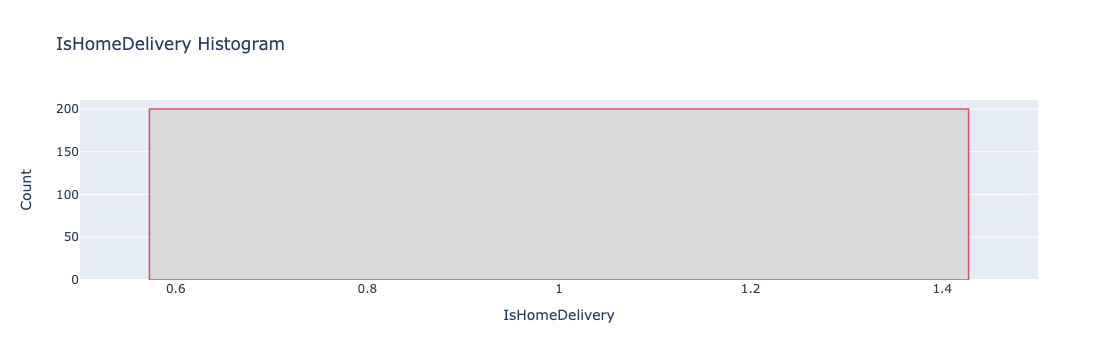

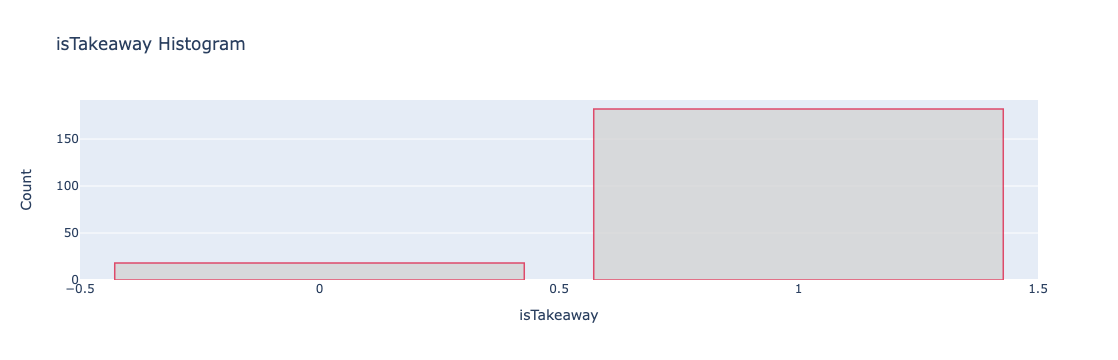

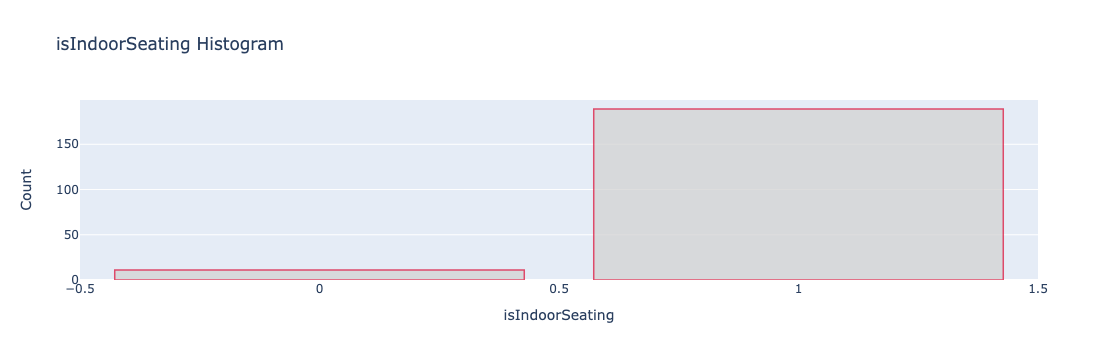

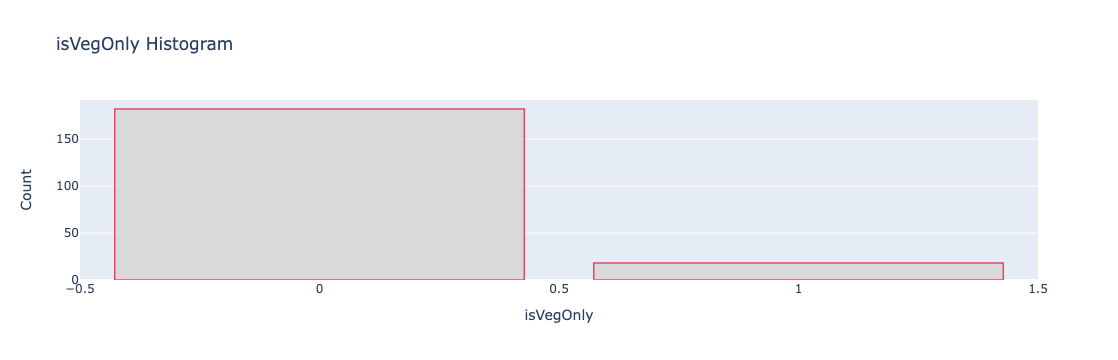

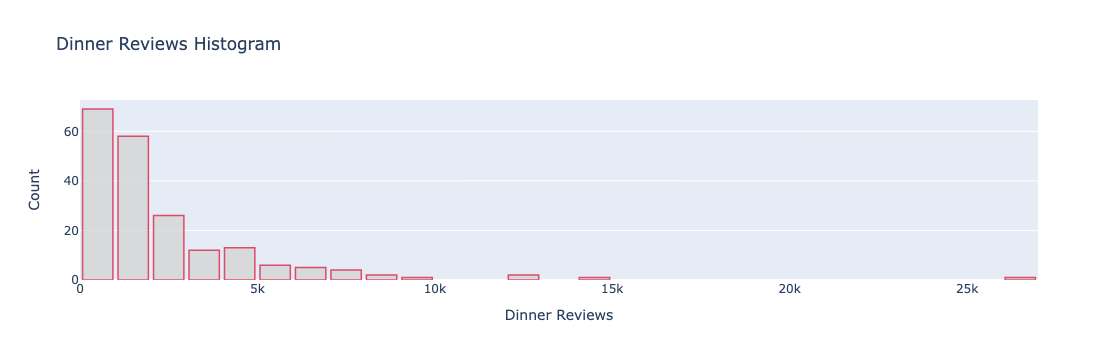

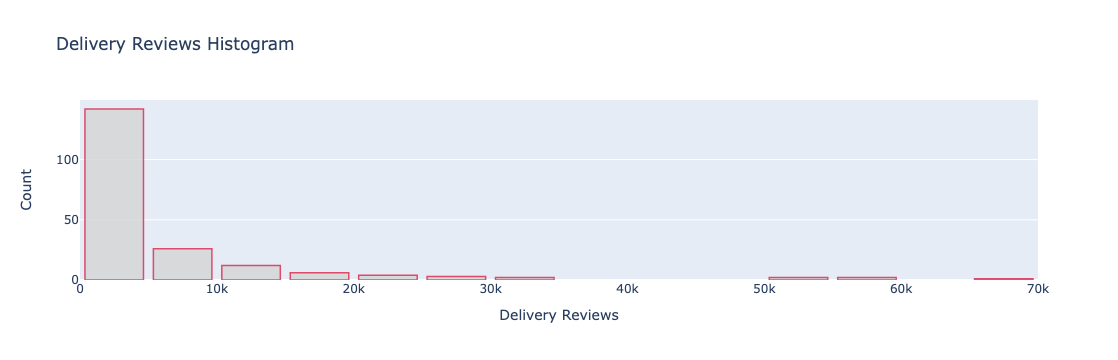

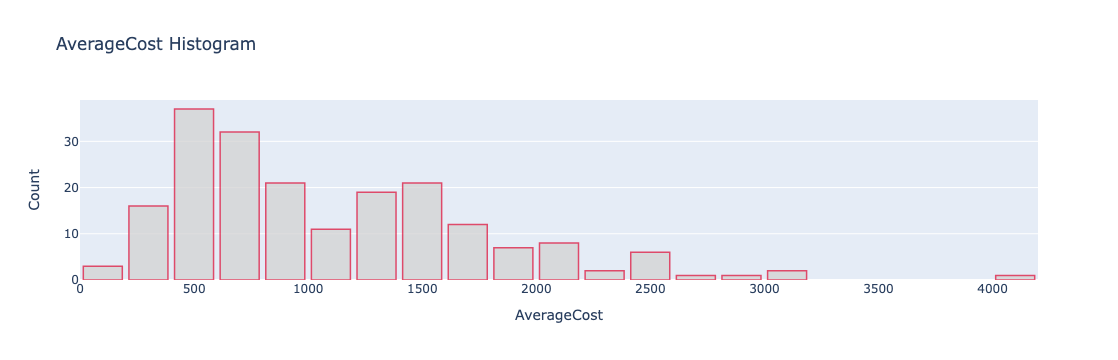

In [8]:
import plotly.graph_objects as go
import pandas as pd

# Assuming 'df' is your DataFrame

for i in df.select_dtypes(include=['int64']):
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=df[i], marker_color='lightgray', opacity=0.75))
    
    fig.update_traces(marker_line_color='crimson', marker_line_width=1.5)
    
    fig.update_layout(
        title=i + ' Histogram',
        xaxis_title=i,
        yaxis_title='Count',
        bargap=0.1,  # Gap between bars of adjacent location coordinates
        bargroupgap=0.05  # Gap between bars of the same location coordinates
    )
    
    fig.show()


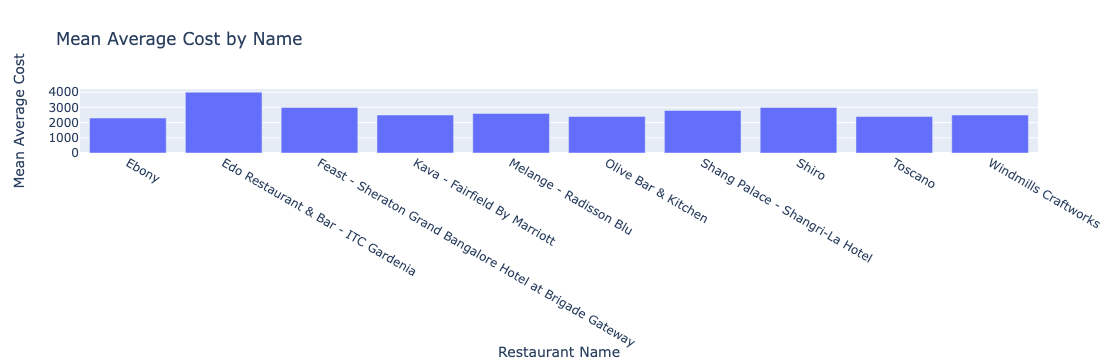

In [9]:
import pandas as pd
import plotly.express as px

# Assuming df is your original DataFrame with columns like 'Name' and 'AverageCost'

# Create a copy of the DataFrame and perform necessary operations
df1 = df.copy().sort_values(by='AverageCost', ascending=False).drop_duplicates('Name').head(10)

# Convert 'AverageCost' to numeric if necessary
df1['AverageCost'] = pd.to_numeric(df1['AverageCost'], errors='coerce')

# Group by 'Name' and calculate mean of 'AverageCost'
mean_costs_by_name = df1.groupby('Name')['AverageCost'].mean().reset_index()

# Plot using Plotly Express
fig = px.bar(mean_costs_by_name, x='Name', y='AverageCost', 
             title='Mean Average Cost by Name', 
             labels={'AverageCost': 'Mean Average Cost', 'Name': 'Restaurant Name'})

# Customize layout
fig.update_layout(xaxis_title='Restaurant Name', yaxis_title='Mean Average Cost')

# Show the plot
fig.show()


In [10]:
df1.groupby(['AverageCost', 'Name']).sum()

URL  \
AverageCost Name                                                                                                    
2300        Ebony                                                  https://www.zomato.com/bangalore/ebony-mg-road   
2400        Olive Bar & Kitchen                                 https://www.zomato.com/bangalore/olive-bar-kit...   
            Toscano                                             https://www.zomato.com/bangalore/toscano-malle...   
2500        Kava - Fairfield By Marriott                        https://www.zomato.com/bangalore/kava-fairfiel...   
            Windmills Craftworks                                https://www.zomato.com/bangalore/windmills-cra...   
2600        Melange - Radisson Blu                              https://www.zomato.com/bangalore/melange-radis...   
2800        Shang Palace - Shangri-La Hotel                     https://www.zomato.com/bangalore/shang-palace-...   
3000        Feast - Sheraton Grand Bangalore Hotel at Briga...  https://www.zomato.com/bangalore/feast-sherato...   
            Shiro                                               https://www.zomato.com/bangalore/shiro-lavelle...   
4000        Edo Restaurant & Bar - ITC Gardenia                 https://www.zomato.com/bangalore/edo-restauran...   

                                                                                                         Cuisines  \
AverageCost Name                                                                                                    
2300        Ebony                                                  North Indian, Mughlai, Hyderabadi, Asian, Thai   
2400        Olive Bar & Kitchen                                 Italian, Pizza, Mediterranean, Continental, Eu...   
            Toscano                                             Italian, Continental, European, Healthy Food, ...   
2500        Kava - Fairfield By Marriott                                  North Indian, South Indian, Continental   
            Windmills Craftworks                                Continental, Fast Food, Kebab, Beverages, Ital...   
2600        Melange - Radisson Blu                                  North Indian, Continental, Italian, Beverages   
2800        Shang Palace - Shangri-La Hotel                                                        Chinese, Asian   
3000        Feast - Sheraton Grand Bangalore Hotel at Briga...  North Indian, Continental, Fast Food, Asian, B...   
            Shiro                                                                           Japanese, Asian, Thai   
4000        Edo Restaurant & Bar - ITC Gardenia                                                   Japanese, Sushi   

                                                                                                             Area  \
AverageCost Name                                                                                                    
2300        Ebony                                                                        Barton Centre, Bangalore   
2400        Olive Bar & Kitchen                                                          Richmond Road, Bangalore   
            Toscano                                                           Orion Mall, Malleshwaram, Bangalore   
2500        Kava - Fairfield By Marriott                            Fairfield by Marriott,Rajajinagar , Bangalore   
            Windmills Craftworks                                                  Windmills Craftworks, Bangalore   
2600        Melange - Radisson Blu                                          Radisson Blu, Marathahalli, Bangalore   
2800        Shang Palace - Shangri-La Hotel                           Shangri-La Hotel, Vasanth Nagar , Bangalore   
3000        Feast - Sheraton Grand Bangalore Hotel at Briga...  Sheraton Grand Bangalore Hotel at Brigade Gate...   
            Shiro                                                                              UB City, Bangalore   
4000        E

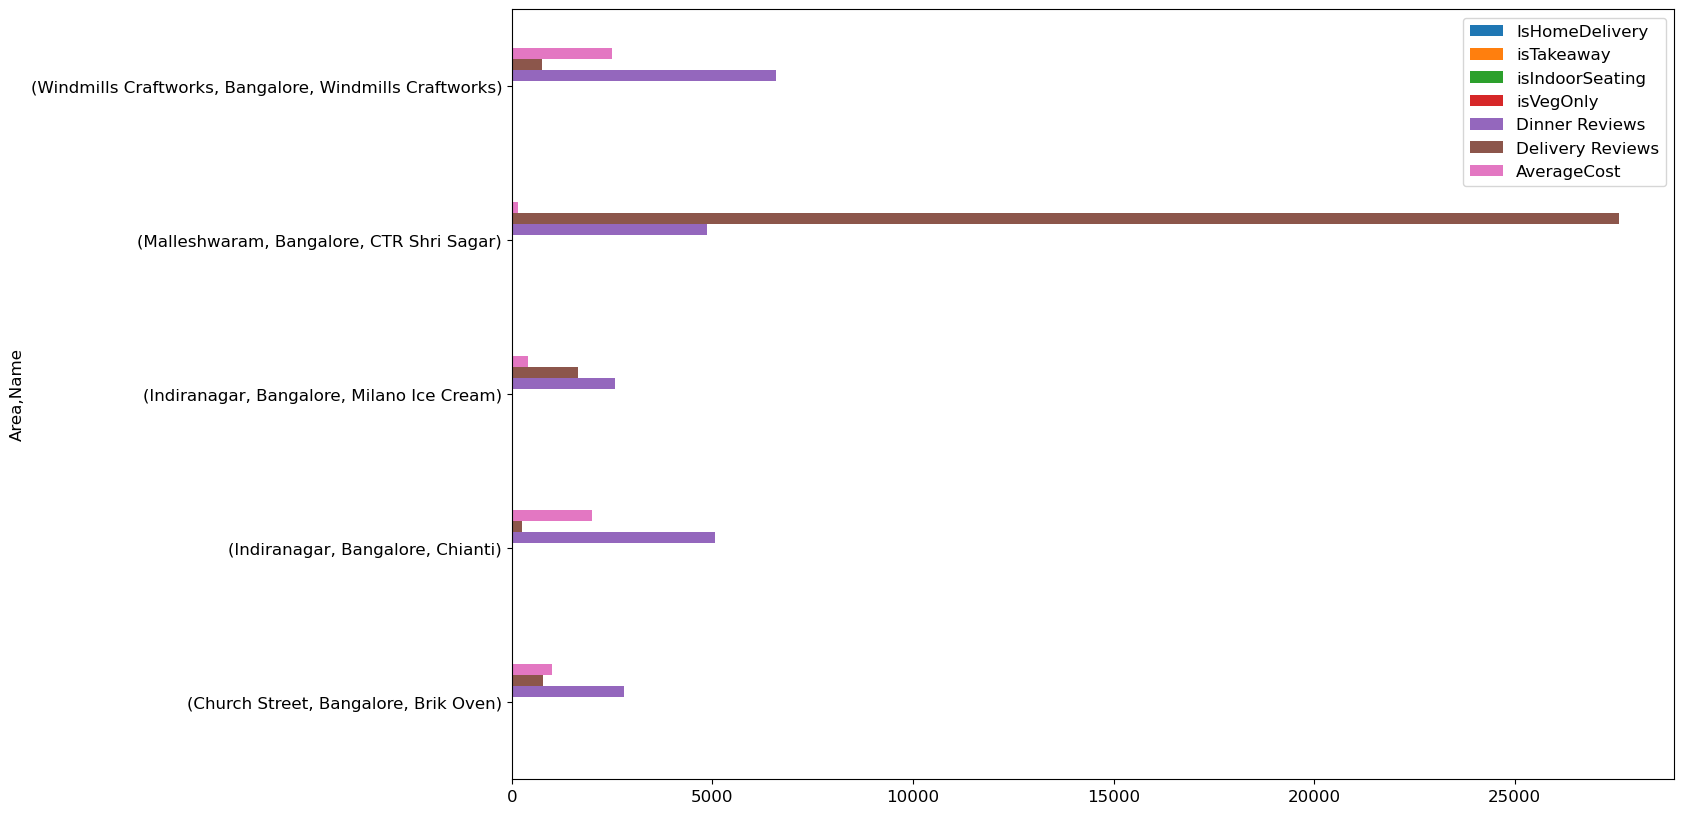

In [11]:
df2 = df.copy().sort_values(by='Dinner Ratings',ascending= False).drop_duplicates('Name').head(5)
df2.groupby(['Area','Name']).sum().plot.barh();

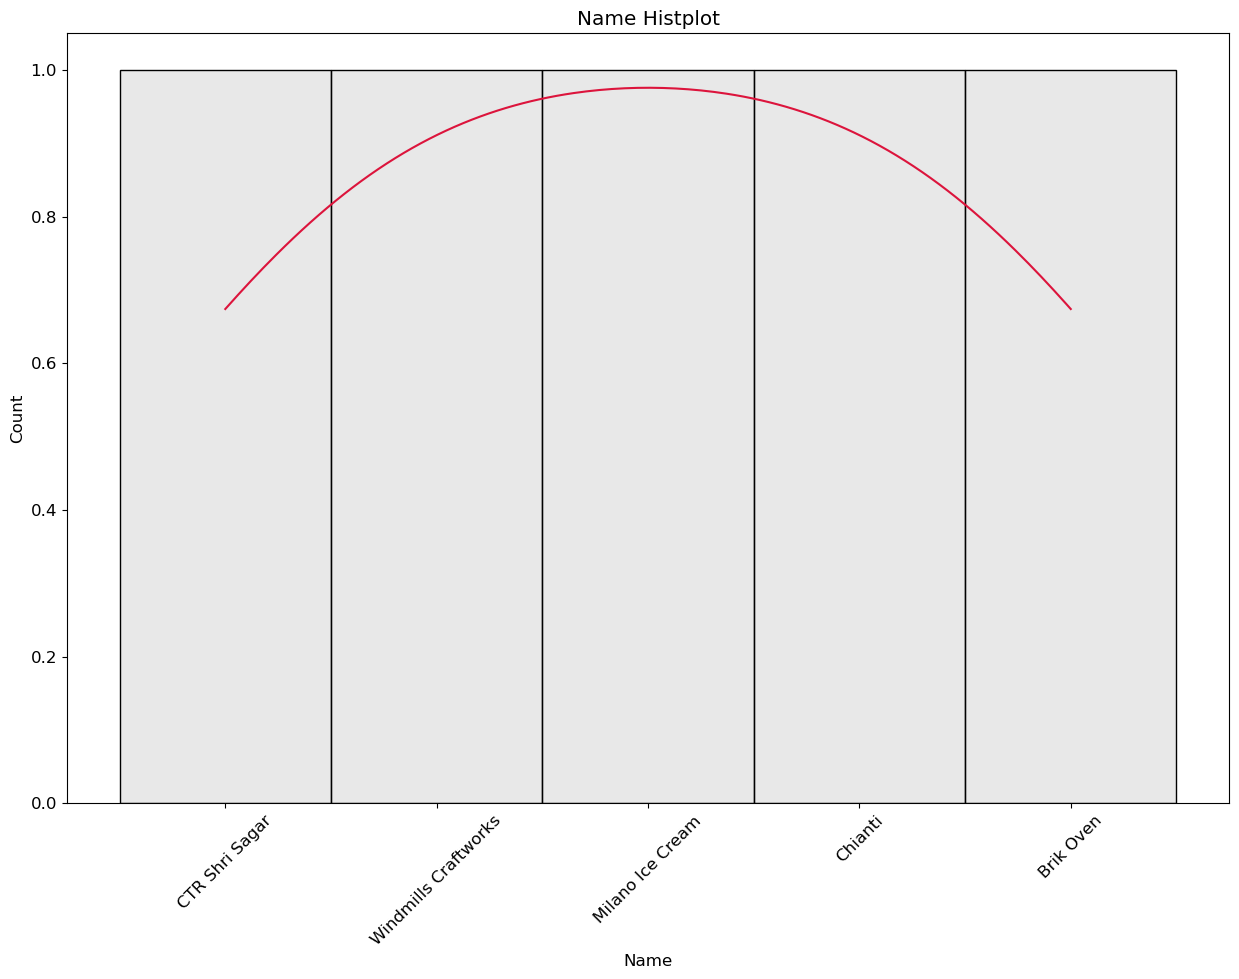

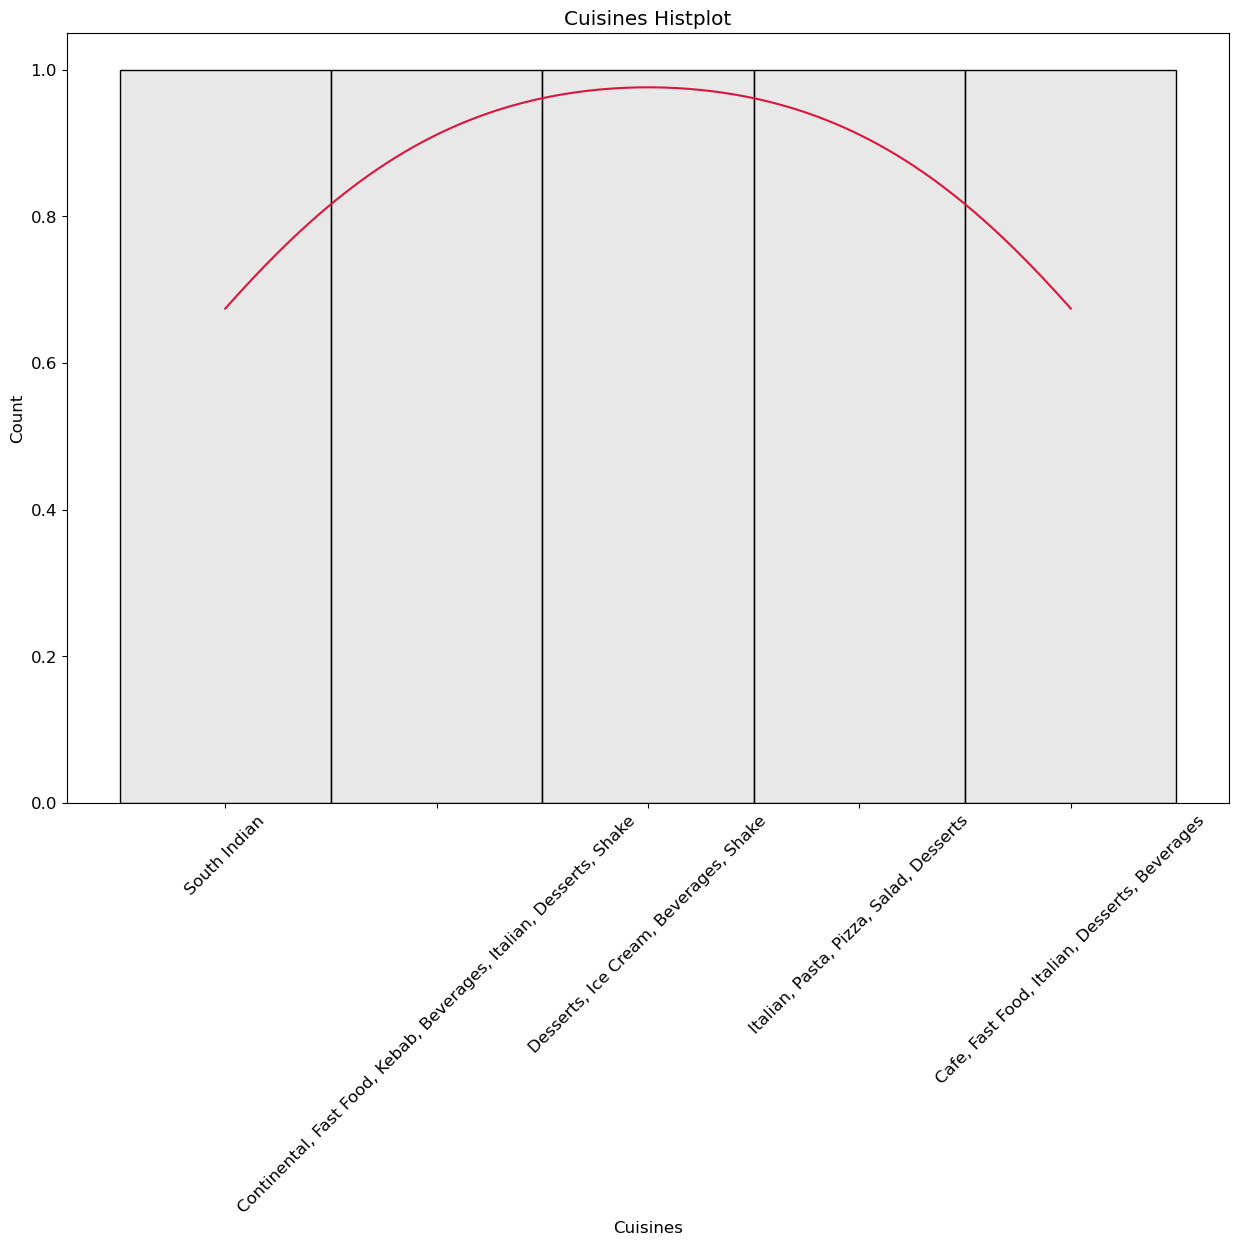

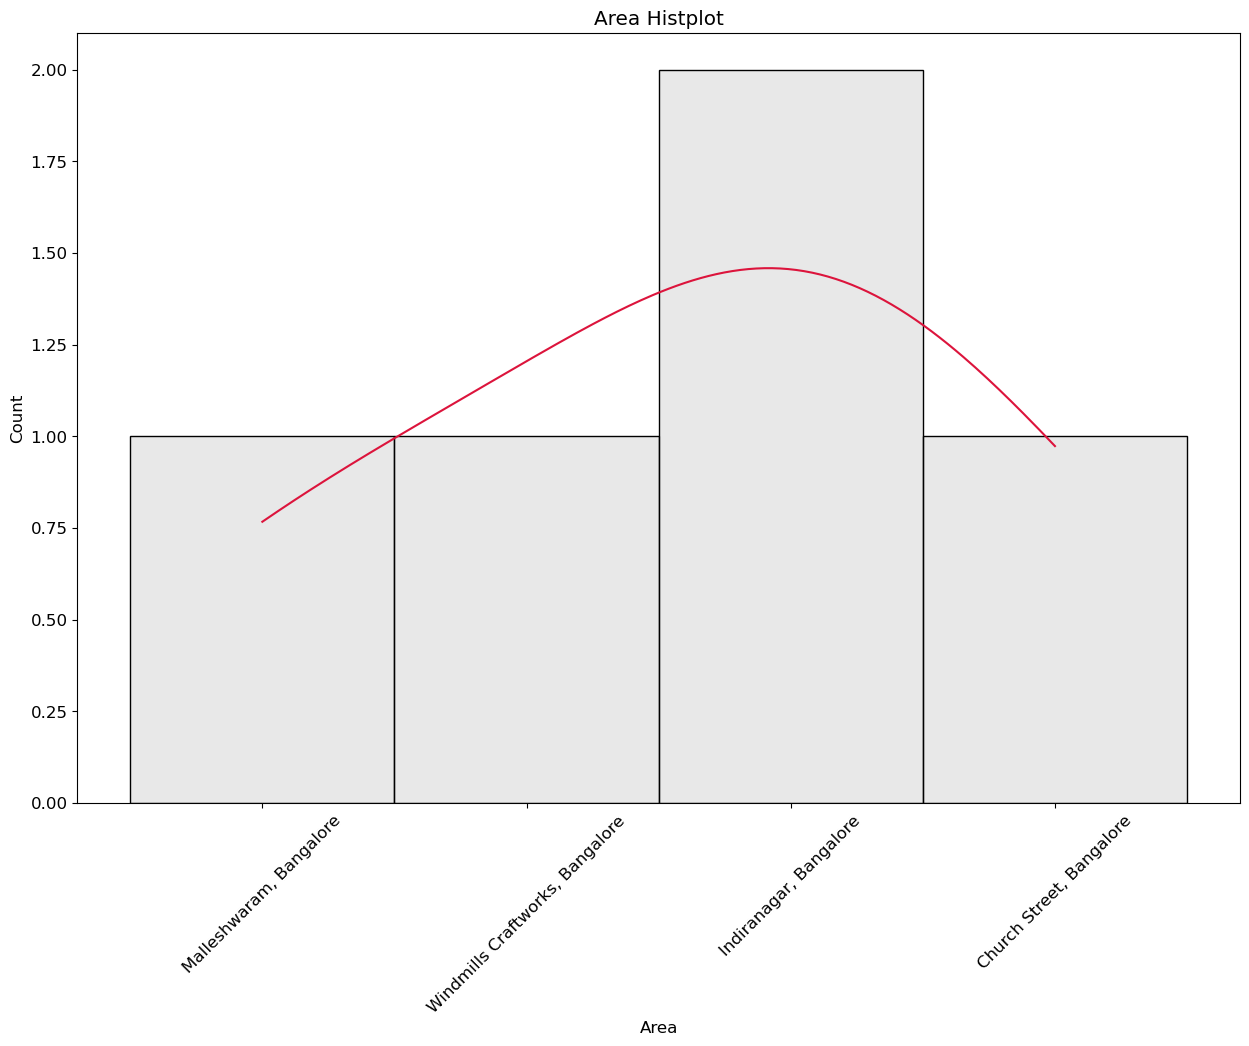

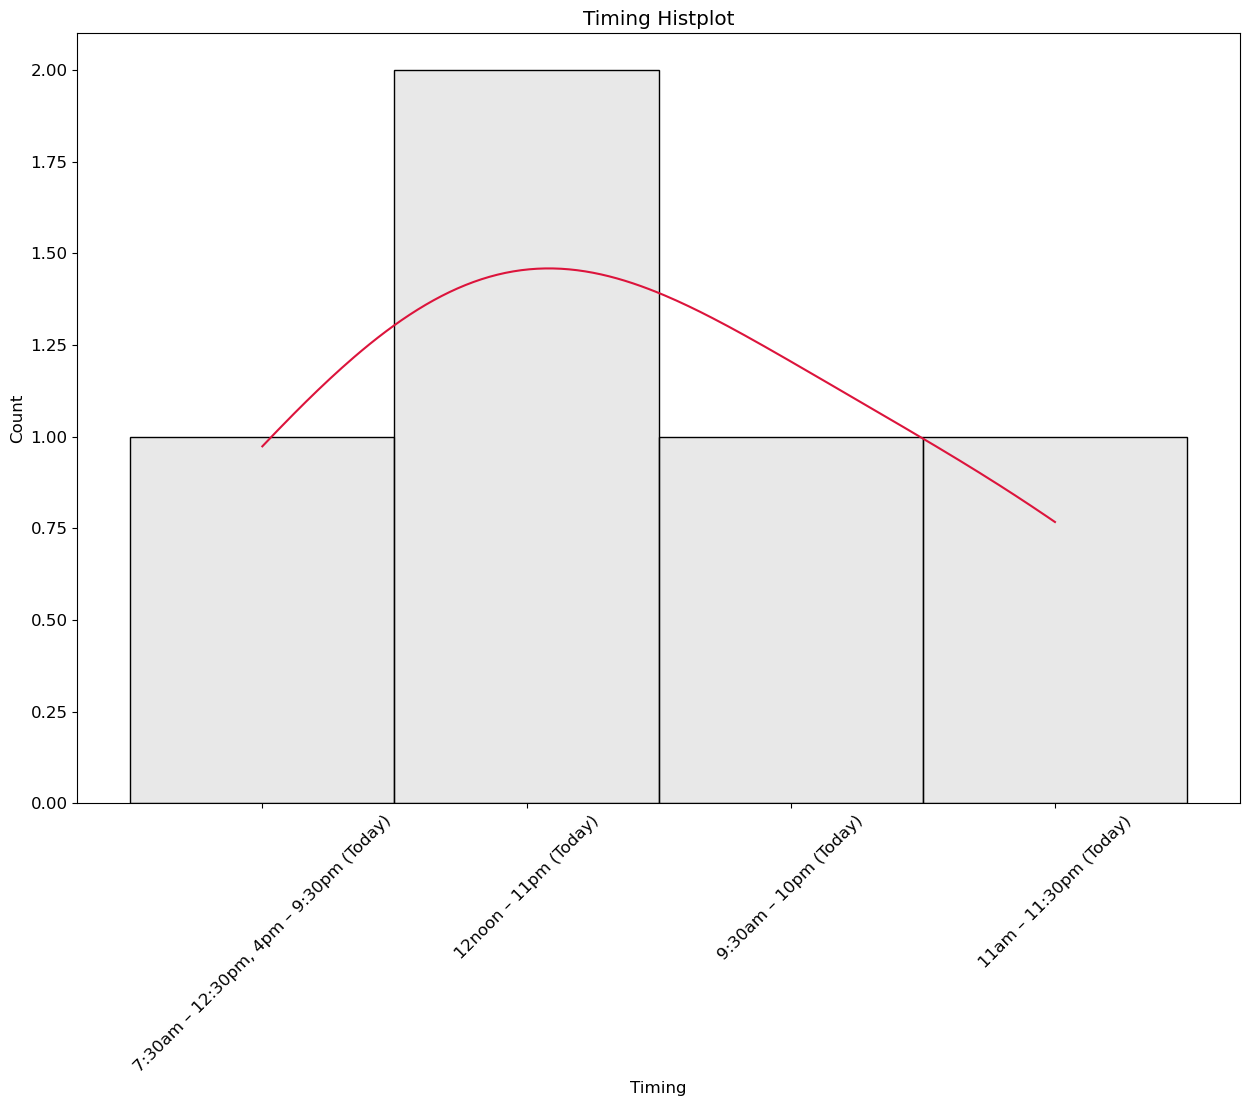

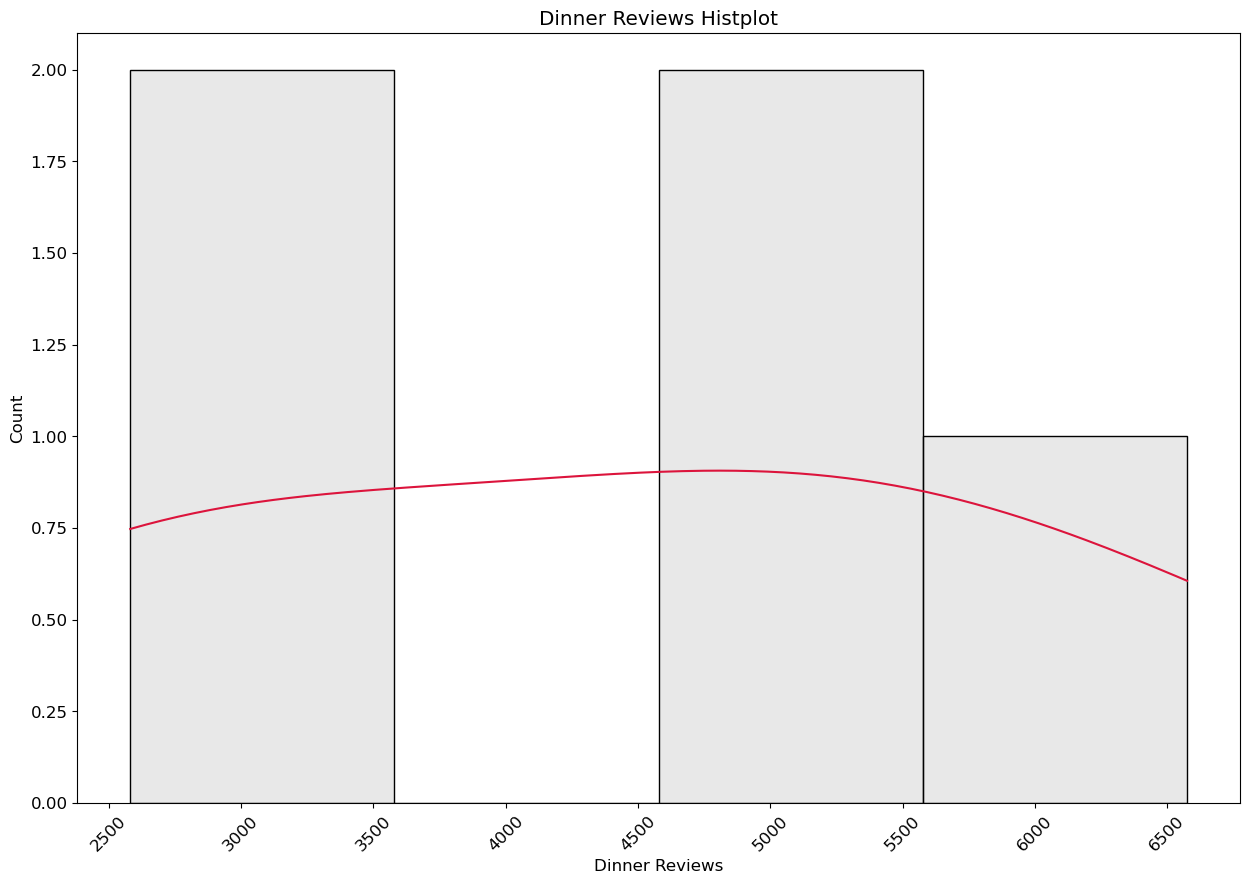

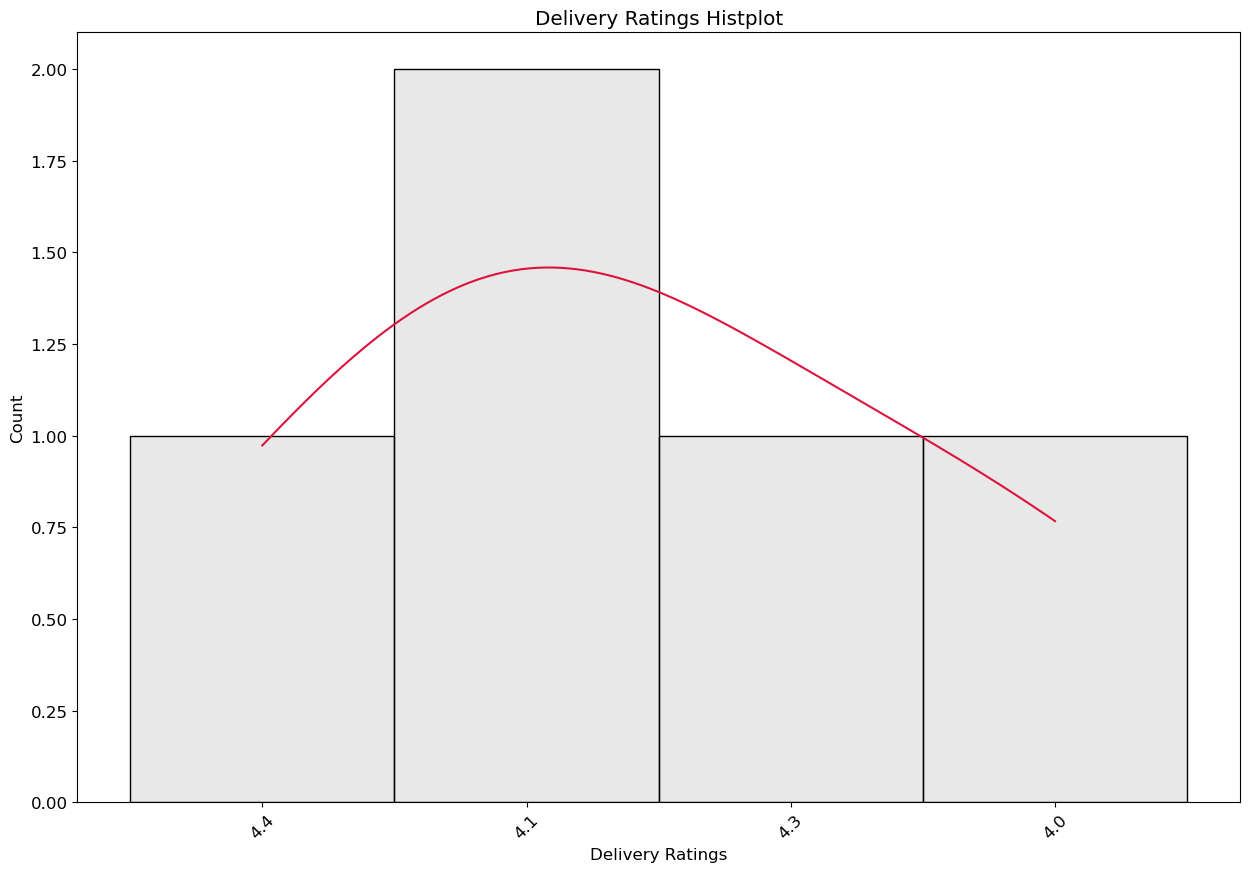

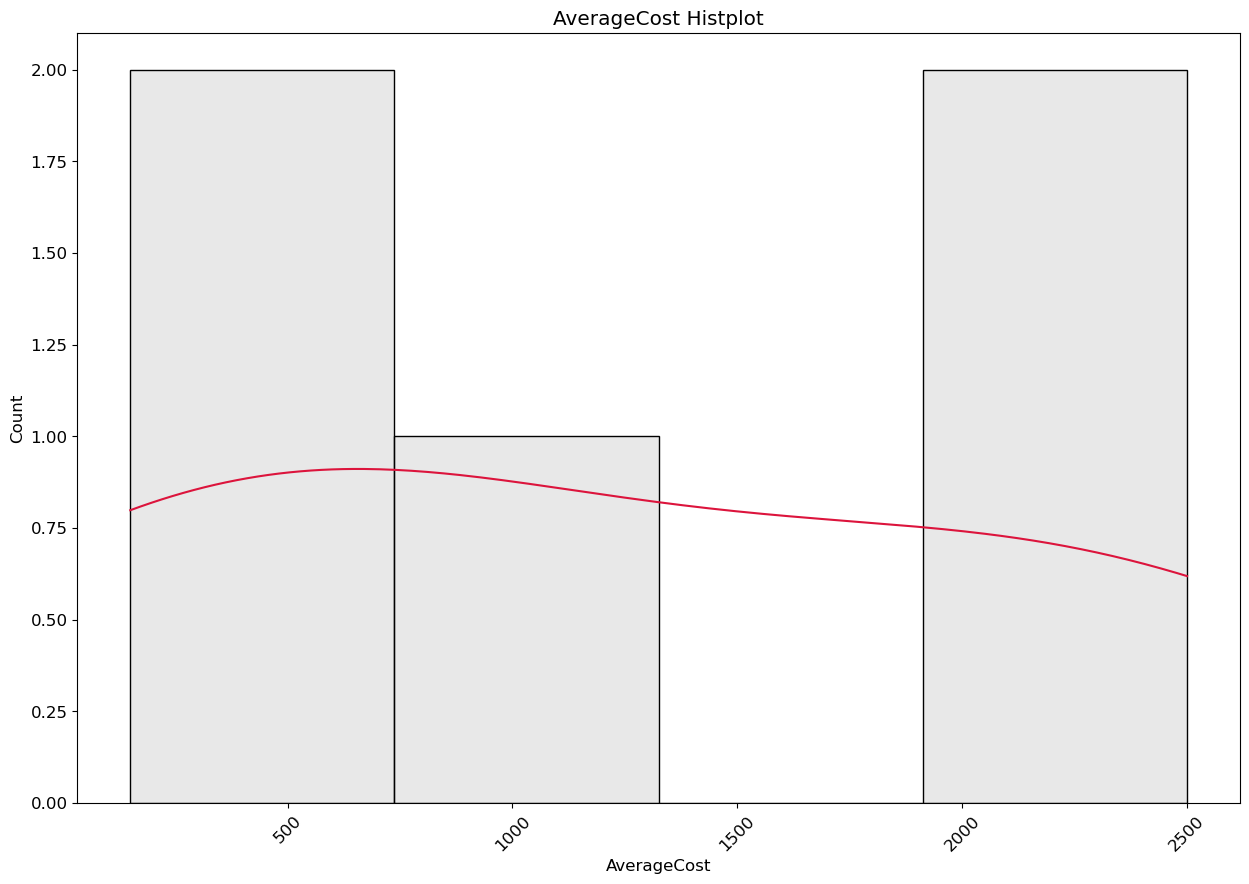

In [12]:
for i in df2[['Name', 'Cuisines', 'Area', 'Timing', 'Dinner Reviews',
       'Delivery Ratings', 'AverageCost']]:
    
    ax= sns.histplot(df2[['Name', 'Cuisines', 'Area', 'Timing', 'Dinner Reviews',
       'Delivery Ratings', 'PopularDishes', 'AverageCost']][i],  
             kde=True, color='lightgray')
    ax.lines[0].set_color('crimson')
    plt.title(i+" "+'Histplot')
    plt.xticks(rotation = 45)
    plt.show();

In [13]:
# Converting Ratings to float from object datatype
df['Dinner Ratings'] = df['Dinner Ratings'].str.replace('-', '0').astype(np.float64)
df['Delivery Ratings'] = df['Delivery Ratings'].str.replace('-', '0').astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 8914
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              200 non-null    object 
 1   URL               200 non-null    object 
 2   Cuisines          200 non-null    object 
 3   Area              200 non-null    object 
 4   Timing            200 non-null    object 
 5   Full_Address      200 non-null    object 
 6   PhoneNumber       200 non-null    object 
 7   IsHomeDelivery    200 non-null    int64  
 8   isTakeaway        200 non-null    int64  
 9   isIndoorSeating   200 non-null    int64  
 10  isVegOnly         200 non-null    int64  
 11  Dinner Ratings    200 non-null    float64
 12  Dinner Reviews    200 non-null    int64  
 13  Delivery Ratings  200 non-null    float64
 14  Delivery Reviews  200 non-null    int64  
 15  KnownFor          200 non-null    object 
 16  PopularDishes     200 non-null    object 
 17  P

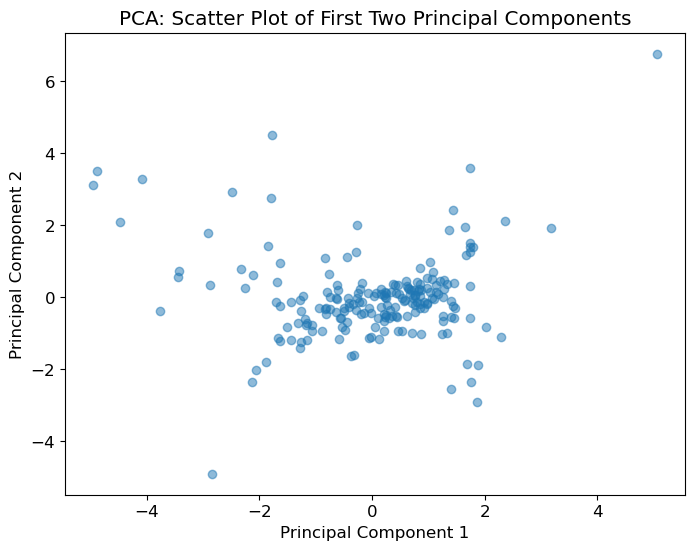

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with features
# Extract features (numeric columns) from the DataFrame
features = df.select_dtypes(include=[np.number]).dropna(axis=1)

# Standardize the feature matrix
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Specify the number of components
n_components = 2  # You can change this to the desired number of components

# Apply PCA
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f"PC{i+1}" for i in range(n_components)])
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Plotting the PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA: Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


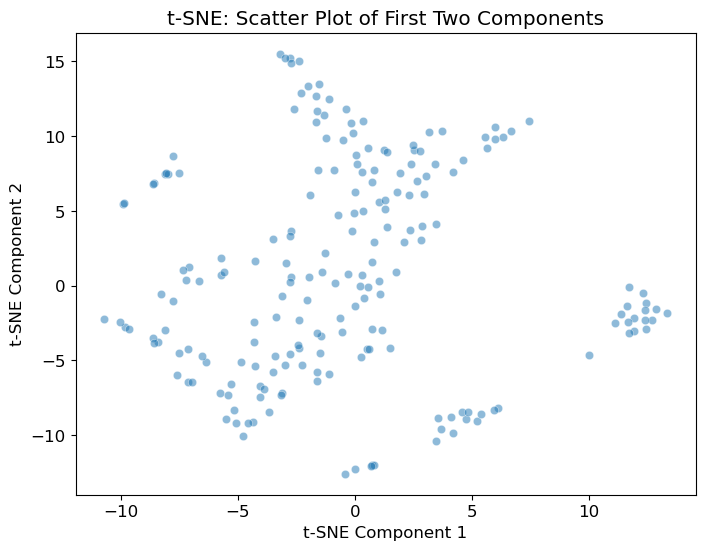

In [16]:
from sklearn.manifold import TSNE
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Assuming 'df' is your DataFrame with features
# Extract features (numeric columns) from the DataFrame
features = df.select_dtypes(include=[np.number]).dropna(axis=1)

# Standardize the feature matrix
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Specify the number of components (usually 2 for visualization)
n_components = 2

# Apply t-SNE
tsne = TSNE(n_components=n_components, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(data=tsne_result, columns=[f"t-SNE-{i+1}" for i in range(n_components)])

# Plotting the t-SNE components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_df['t-SNE-1'], y=tsne_df['t-SNE-2'], alpha=0.5)
plt.title('t-SNE: Scatter Plot of First Two Components')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [12]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Transforming transactions into encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Applying Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Generating association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)


In [11]:
transactions = df['Cuisines'].str.split(',').apply(lambda x: [s.strip() for s in x]).tolist()


In [13]:
# Displaying association rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Filtering rules based on desired criteria (e.g., lift > 1, confidence > 0.7)
filtered_rules = rules[(rules['lift'] > 1) & (rules['confidence'] > 0.7)]


          antecedents                                        consequents  \
0          (American)                                        (Beverages)   
1         (Beverages)                                         (American)   
2          (American)                                           (Burger)   
3            (Burger)                                         (American)   
4          (American)                                             (Cafe)   
...               ...                                                ...   
40151       (Seafood)  (South Indian, Biryani, Chettinad, Mughlai, Ch...   
40152       (Mughlai)  (South Indian, Biryani, Chettinad, Seafood, Ch...   
40153       (Chinese)  (South Indian, Biryani, Chettinad, Seafood, Mu...   
40154  (North Indian)  (South Indian, Biryani, Chettinad, Seafood, Mu...   
40155      (Desserts)  (South Indian, Biryani, Chettinad, Seafood, Mu...   

       support  confidence      lift  
0        0.020    0.571429  1.098901  
1        